In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

In [156]:
gender_data = pd.read_csv('gender_classification_v7.csv')
gender_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [195]:
gender_data["gender"].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [157]:
gender_data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [158]:
gender_data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [159]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [160]:
gender_data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

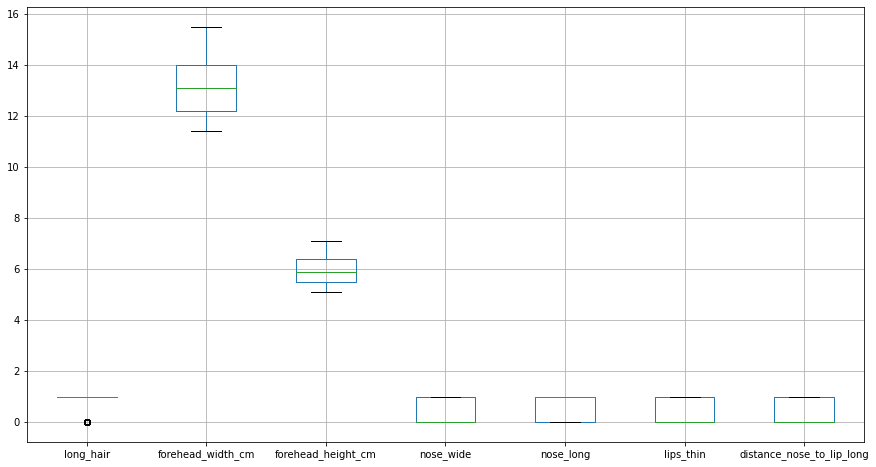

In [161]:
plt.figure(figsize = (15,8))
gender_data.boxplot()

<AxesSubplot:>

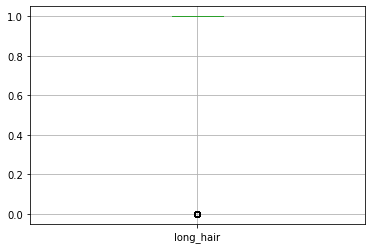

In [162]:
gender_data.boxplot(['long_hair'])

<AxesSubplot:xlabel='gender', ylabel='long_hair'>

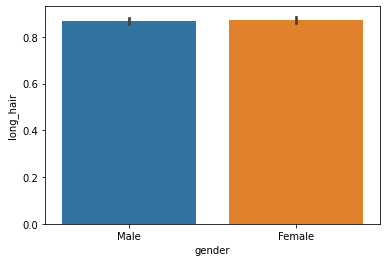

In [163]:
sns.barplot(x="gender", y="long_hair", data=gender_data)

In [ ]:
The plot above shows that long_hair is common to both gender

<AxesSubplot:xlabel='gender', ylabel='forehead_width_cm'>

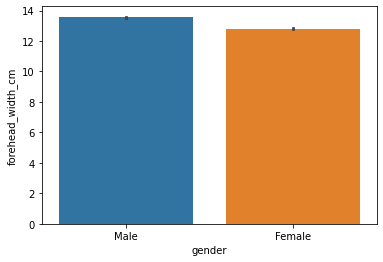

In [164]:
sns.barplot(x="gender", y="forehead_width_cm", data=gender_data)

In [ ]:
The above plot shows that male gender is of foreheadwidth than female gender

<AxesSubplot:xlabel='gender', ylabel='forehead_height_cm'>

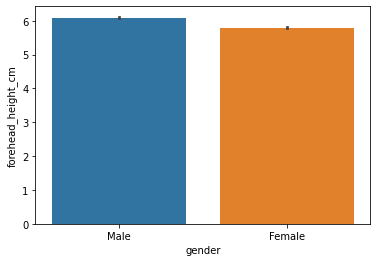

In [165]:
sns.barplot(x="gender", y="forehead_height_cm", data=gender_data)

In [ ]:
The above plot shows that male gender is of forehead_height than female gender

<AxesSubplot:xlabel='gender', ylabel='nose_wide'>

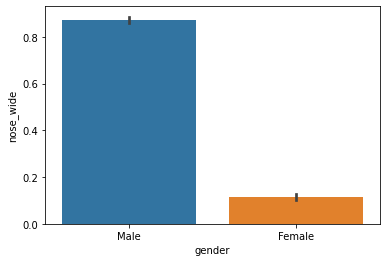

In [166]:
sns.barplot(x="gender", y="nose_wide", data=gender_data)

In [ ]:
The above plot shows that the gender with wide nose is the male gender

<AxesSubplot:xlabel='gender', ylabel='nose_long'>

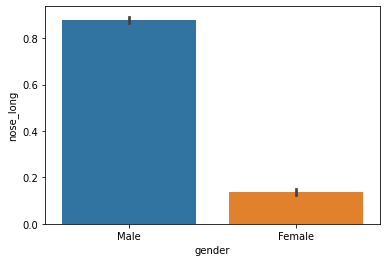

In [167]:
sns.barplot(x="gender", y="nose_long", data=gender_data)

In [ ]:
The above plot shows that the gender with long nose is the male gender

<AxesSubplot:xlabel='gender', ylabel='lips_thin'>

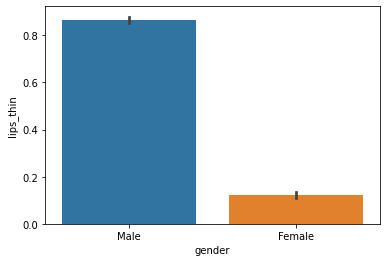

In [168]:
sns.barplot(x="gender", y="lips_thin", data=gender_data)

In [ ]:
The above plot shows that the gender with thin lips is the male gender

<AxesSubplot:xlabel='gender', ylabel='distance_nose_to_lip_long'>

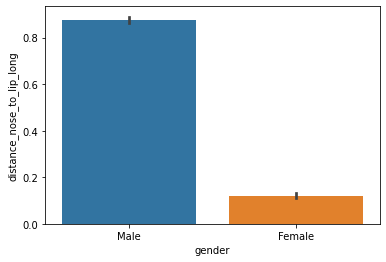

In [169]:
sns.barplot(x="gender", y="distance_nose_to_lip_long", data=gender_data)

In [ ]:
# The above plot shows that the female gender is very few with long distance nose to lip, while long distance nose to lip is very common to male gender

In [170]:
categ = []
for change in range(len(gender_data['gender'])):
    if gender_data['gender'][change] == 'Male':
        categ.append(1)
    else:
        gender_data['gender'][change] == 'Female'
        categ.append(0)
gender_data['gender1'] = categ

In [171]:
gender_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender1
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,0
4997,1,11.9,5.4,0,0,0,0,Female,0
4998,1,12.9,5.7,0,0,0,0,Female,0
4999,1,13.2,6.2,0,0,0,0,Female,0


In [172]:
new_gender = gender_data.drop(columns=['gender'])
new_gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender1
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


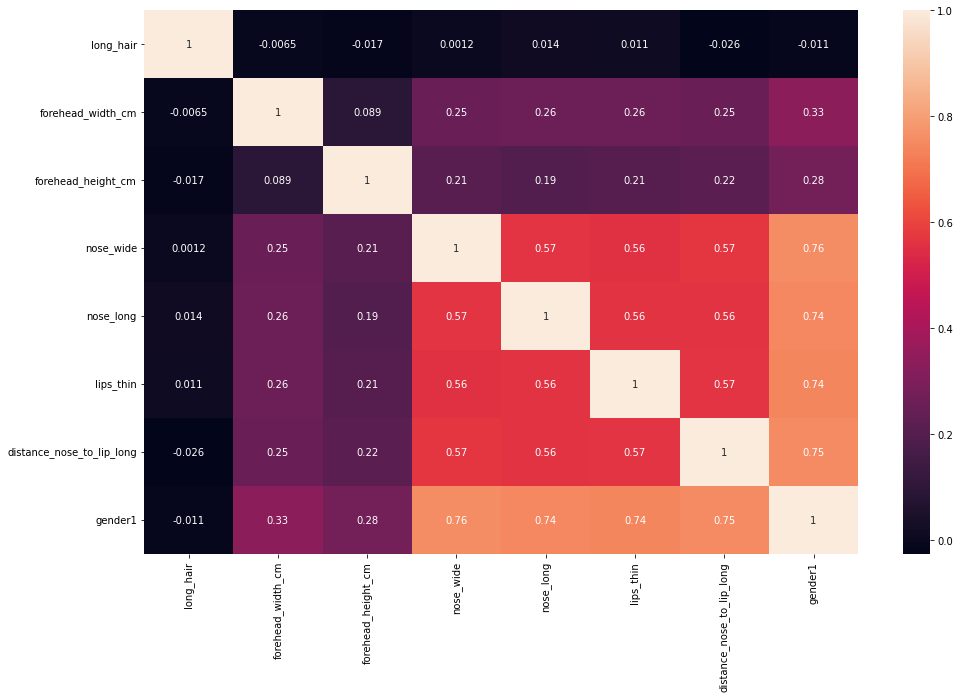

In [173]:
plt.figure(figsize=(16, 10))
sns.heatmap(new_gender.corr(), annot = True);

In [174]:
y = new_gender['gender1']
x = new_gender.drop(columns=['gender1'])

In [175]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [176]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender1, Length: 5001, dtype: int64

In [177]:
X.shape

(5001, 7)

In [178]:
y.shape

(5001,)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45, train_size = .80)

In [180]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(Scaler.fit_transform(X_train))

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, test_size=.20, random_state = 45)

In [181]:
X_train_

,0,1,2,3,4,5,6
3803,0.0,0.902439,0.95,1.0,1.0,1.0,1.0
980,1.0,0.268293,0.80,1.0,1.0,1.0,1.0
46,1.0,0.317073,0.40,0.0,1.0,0.0,0.0
3072,1.0,0.634146,0.25,0.0,0.0,0.0,0.0
3270,0.0,0.292683,0.15,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
3616,1.0,0.780488,0.45,1.0,1.0,1.0,0.0
1916,0.0,0.268293,0.05,1.0,1.0,1.0,1.0
1667,1.0,0.926829,0.45,1.0,0.0,1.0,1.0
2462,1.0,0.268293,0.10,1.0,0.0,0.0,0.0


In [182]:
X_train_.shape

(3200, 7)

In [183]:
y_train_.shape

(3200,)

In [184]:
pca = PCA(n_components=7)
model = pca.fit(X_train_)
PCA(n_components = 7)
print(model.explained_variance_ratio_)

[0.54432155 0.09390792 0.08940675 0.08627195 0.08133573 0.05367409
 0.05108201]


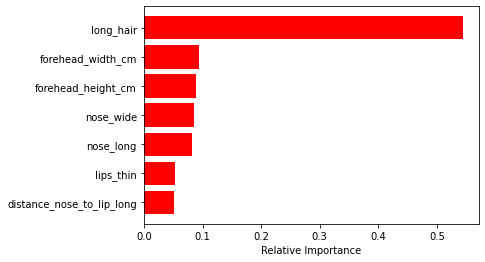

In [185]:
features = gender_data.columns
importance = model.explained_variance_ratio_
indices = np.argsort(importance)[-10:]
plt.barh(range(len(indices)), importance[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [186]:
model = LogisticRegression()
work = model.fit(X_train_, y_train_)
work

LogisticRegression()

In [187]:
coef_deter = work.score(X_train_, y_train_)
coef_deter

0.9696875

In [188]:
1 - (1 - work.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.9696210252192983

In [189]:
y_predict = work.predict(X_test_)

In [190]:
cf_matrix = confusion_matrix(y_test_, y_predict)
cf_matrix

array([[373,   9],
       [ 17, 401]], dtype=int64)

In [191]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 4, random_state= 1)
cv

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [192]:
score = cross_val_score(work, X_test_, y_test_, scoring = 'accuracy', cv = cv, n_jobs = 1, error_score='raise')
np.mean(score)

0.9600000000000002

In [196]:
X_test_.shape

(800, 7)